<a href="https://colab.research.google.com/github/AzrlShiro/Data-Mining/blob/main/UTS_Azriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS


> Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

dengan menggunakan klasifikasi

- metode Naive Bayes Classifier

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)



In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [9]:
dataset_url = "https://raw.githubusercontent.com/AzrlShiro/Data-Mining/main/dataR2.csv"
cancer = pd.read_csv(dataset_url)
cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [13]:
cancer.keys()

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [10]:
print(cancer.size)
print(cancer.shape)
print(cancer.ndim)

1160
(116, 10)
2


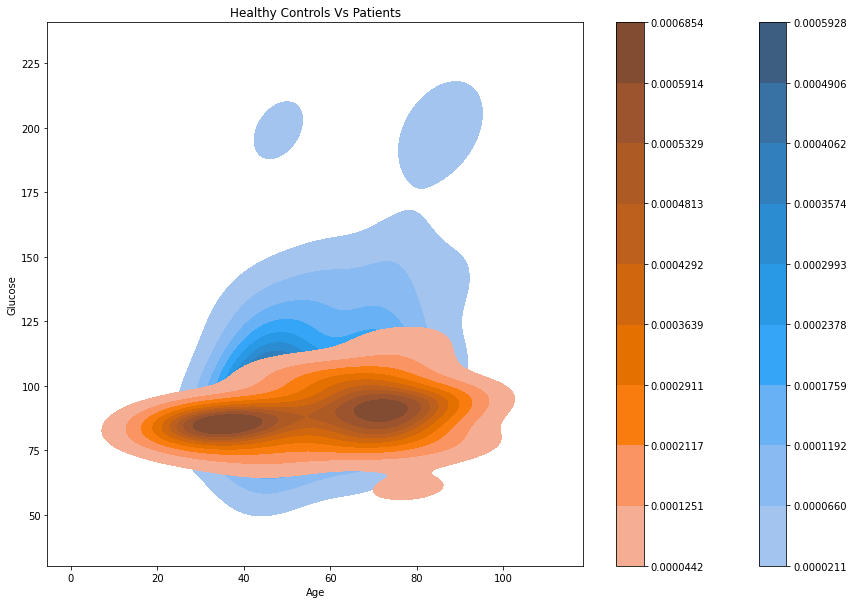

In [14]:
# Healthy = 1
#Patients = 2
Healthy = cancer[cancer.Classification == 1]
Patients = cancer[cancer['Classification'] == 2]
plt.figure(figsize = (15,10))
sns.kdeplot( x = 'Age',y = 'Glucose', data = Patients, shade=True, thresh=0.05, cbar=True)
sns.kdeplot( x = 'Age',y = 'Glucose', data = Healthy, shade=True, thresh=0.05, cbar=True)
plt.title('Healthy Controls Vs Patients');

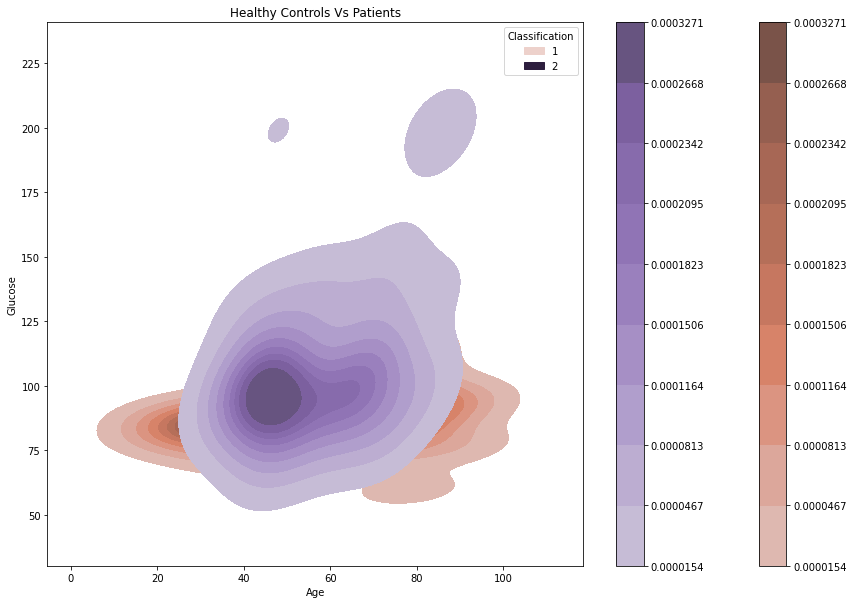

In [16]:
plt.figure(figsize = (15,10))
sns.kdeplot(data=cancer, x="Age", y="Glucose", hue="Classification", shade=True, thresh=0.05, cbar=True)
plt.title('Healthy Controls Vs Patients');

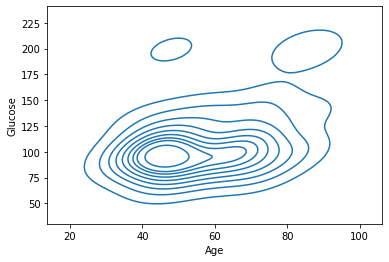

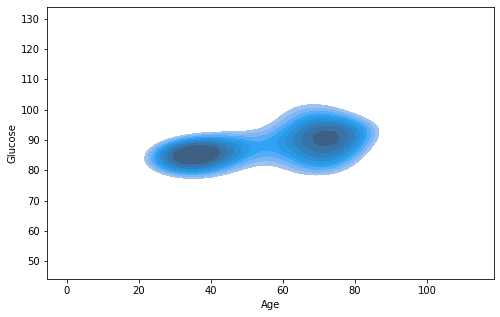

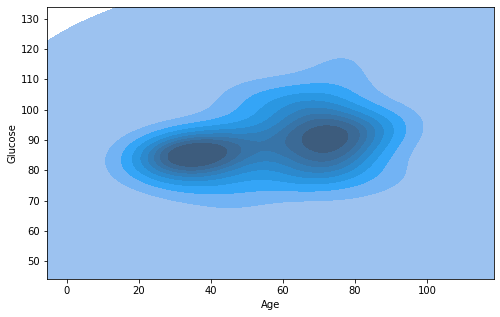

In [21]:
sns.kdeplot( x = 'Age',y = 'Glucose', data = Patients);
plt.figure(figsize = (8,5))
sns.kdeplot( x = 'Age',y = 'Glucose', data = Healthy,  shade = True, thresh=0.5);
plt.figure(figsize = (8,5))
sns.kdeplot( x = 'Age',y = 'Glucose', data = Healthy,  fill=True, thresh=0);

In [22]:
cancer.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


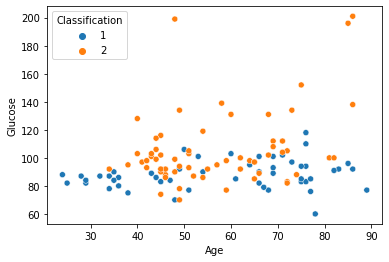

In [23]:
sns.scatterplot(x = 'Age', y ='Glucose', hue = 'Classification', data = cancer, palette = 'tab10');

In [24]:
cancer['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [25]:
X = cancer.loc[:, cancer.columns != 'Classification']
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [27]:
y = cancer["Classification"]
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [28]:
y = y.replace({1: 0, 2: 1})

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (92, 9) (92,)
Test set: (24, 9) (24,)


# Klasifikasi Naive Bayes

In [30]:
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred_NB = NB.predict(X_test)

In [31]:
print("Train set Accuracy: ", accuracy_score(y_train, NB.predict(X_train)))

accuracy = (y_pred_NB == y_test).sum() / len(y_test)

print('Accuracy of Naive Bayes Classifier calculated manually is ', accuracy.round(2))
print('Accuracy of Naive Bayes Classifier is ', accuracy_score(y_test, y_pred_NB))
print('\n', '\n','Confusion Matrix of Naive Bayes Classifier:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for Naive Bayes Classifier:' '\n',classification_report(y_test, y_pred_NB))

Train set Accuracy:  0.6304347826086957
Accuracy of Naive Bayes Classifier calculated manually is  0.67
Accuracy of Naive Bayes Classifier is  0.6666666666666666

 
 Confusion Matrix of Naive Bayes Classifier:
 [[12  2]
 [ 6  4]]

 
 Classification Report for Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.67      0.40      0.50        10

    accuracy                           0.67        24
   macro avg       0.67      0.63      0.62        24
weighted avg       0.67      0.67      0.65        24



# Metode Decision Tree

In [38]:
#Train Model dan Predict  
decision = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decision.fit(X_train,y_train)
y_pred_DT = decision.predict(X_test)
cm = confusion_matrix(y_test, y_pred_DT)

In [39]:
accuracy = (y_pred_DT == y_test).sum() / len(y_test)

print("Train set Accuracy: ", accuracy_score(y_train, DT.predict(X_train)))
print('Accuracy of Decision Tree Model calculated manually is ', accuracy.round(2))
print('Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DT))
print('\n', '\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DT))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DT))

Train set Accuracy:  0.9456521739130435
Accuracy of Decision Tree Model calculated manually is  0.79
Accuracy of Decision Tree Model is  0.7916666666666666

 
 Confusion Matrix of Decision Tree Model:
 [[12  2]
 [ 3  7]]

 
 Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.78      0.70      0.74        10

    accuracy                           0.79        24
   macro avg       0.79      0.78      0.78        24
weighted avg       0.79      0.79      0.79        24

